# Data Expo 2009 - Airline on-time performance
## by Abdalla Mohamed

## Preliminary Wrangling
> This dataset is taken from the American Statistical Association (ASA) [webiste](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009). Every year the ASA organizes a data science challenge called Data Expo where a raw dataset is provided for analyses. This dataset is from the Data Expo 2009 challenge where the dataset represents Airline on-time performance. It is a collection of all domestic US flights operated by major carriers and collects data points such as: actual departure time, scheduled departure time, airline carrier, flight number, air time, origin airport, destination airport, was the flight cancelled, reason for cancellation and so on. The data provided starts from the year 1987 and goes up to 2008. For this project, only year 2005 will be analyzed. The zipped file for all years can be downloaded [here](http://ww2.amstat.org/sections/graphics/datasets/DataExpo2009.zip)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('2005.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


### What is the structure of your dataset?

In [3]:
print('The dataframe shape is: {}\n'.format(df.shape))
df.info()

The dataframe shape is: (7140596, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140596 entries, 0 to 7140595
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDela

There are 29 variables, mostly numeric and some categorical. 

In [4]:
# display all columns
pd.set_option('display.max_columns', None)

### What is/are the main feature(s) of interest in your dataset?

> Being able to predict the on time performance of a particular flight on a certain day for American Airlines

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the day of week and departure times to have the biggest effect on flight delays. I suspect weekends or days with more flights may suffer from delays due to a larger workload for staff to turn around a higher volume of aircrafts 

## Univariate Exploration


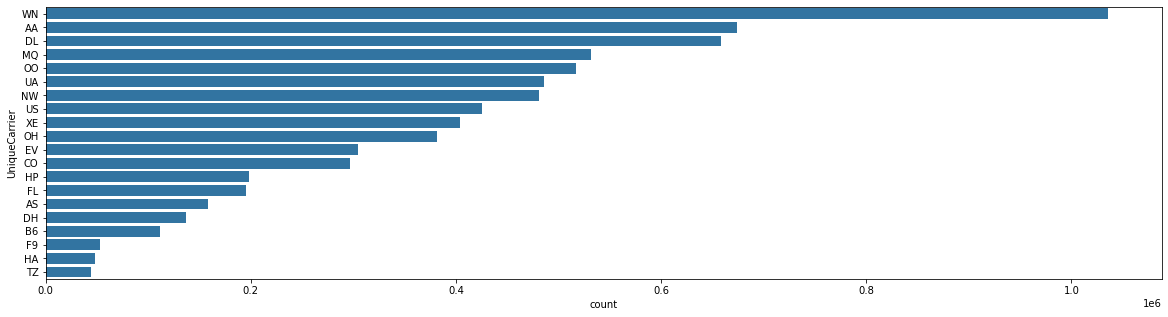

In [5]:
# lets take a look at the number of flights per carrier
plt.figure(figsize=[20,5])
order = df.UniqueCarrier.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='UniqueCarrier', order = order, color=base_color);

We can see the airline with the most flights is carrier "WN" which is the identifier for Southwest Airlines.
For this analysis we will only take a look at American Airlines flights, so we will create a subset of this data called "df_aa"

In [6]:
df_aa = df[df['UniqueCarrier']=='AA'].reset_index(drop=True)
df_aa

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,901.0,900,1214.0,1210,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,855.0,900,1236.0,1210,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,901.0,900,1238.0,1210,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,856.0,900,1306.0,1210,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,857.0,900,1154.0,1210,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673564,2005,12,27,2,1525.0,1525,1711.0,1654,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
673565,2005,12,28,3,1535.0,1525,1700.0,1654,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
673566,2005,12,29,4,1517.0,1525,1650.0,1654,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
673567,2005,12,30,5,1525.0,1525,1647.0,1654,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


The new subset of data has 673,569 records for the year 2005. 

In [7]:
# check to see if any null cells
df_aa.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                9752
CRSDepTime                0
ArrTime               11469
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime     11469
CRSElapsedTime            0
AirTime               11469
ArrDelay              11469
DepDelay               9752
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode     663817
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [8]:
# drop the rows that dont have data for Departure time
# drop rows that dont have data for Arrival time
df_aa = df_aa[df_aa.DepTime.notna()]
df_aa = df_aa[df_aa.ArrTime.notna()]

In [9]:
df_aa

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,901.0,900,1214.0,1210,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,855.0,900,1236.0,1210,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,901.0,900,1238.0,1210,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,856.0,900,1306.0,1210,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,857.0,900,1154.0,1210,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673564,2005,12,27,2,1525.0,1525,1711.0,1654,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
673565,2005,12,28,3,1535.0,1525,1700.0,1654,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
673566,2005,12,29,4,1517.0,1525,1650.0,1654,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
673567,2005,12,30,5,1525.0,1525,1647.0,1654,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


In [10]:
# check to confirm null cells are dropped
df_aa.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode     662100
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [11]:
df_aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662100 entries, 0 to 673568
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               662100 non-null  int64  
 1   Month              662100 non-null  int64  
 2   DayofMonth         662100 non-null  int64  
 3   DayOfWeek          662100 non-null  int64  
 4   DepTime            662100 non-null  float64
 5   CRSDepTime         662100 non-null  int64  
 6   ArrTime            662100 non-null  float64
 7   CRSArrTime         662100 non-null  int64  
 8   UniqueCarrier      662100 non-null  object 
 9   FlightNum          662100 non-null  int64  
 10  TailNum            662100 non-null  object 
 11  ActualElapsedTime  662100 non-null  float64
 12  CRSElapsedTime     662100 non-null  int64  
 13  AirTime            662100 non-null  float64
 14  ArrDelay           662100 non-null  float64
 15  DepDelay           662100 non-null  float64
 16  Or

In [12]:
def cleanDates(df, yVar):
    '''
    this function is used to convert the float format given for some date variables and converts it into
    a datetime format
    '''
    # change the data type to datetime
    df[yVar] = df[yVar].astype(str).str.replace('.0', '', regex=True)    # remove the '.0'
    df[yVar] = df[yVar].str.zfill(4)    # add leading zero if less than 4  digit
    df[yVar] = df[yVar].str[:2] + ':' + df[yVar].str[2:]    # add ":" time seperator between hour and minute
    df[yVar] = df[yVar].str.replace('24', '00')    # replace all hours that read 24 into 00
    df[yVar] = pd.to_datetime(df[yVar], format='%H:%M')
    
    return df[yVar]

In [13]:
# change to appropriate datatypes

# change the data type for flight number to string
df_aa['FlightNum'] = df_aa['FlightNum'].astype(str)

df_aa['DepTime'] = cleanDates(df_aa, 'DepTime')
df_aa['CRSDepTime'] = cleanDates(df_aa, 'CRSDepTime')
df_aa['ArrTime'] = cleanDates(df_aa, 'ArrTime')
df_aa['CRSArrTime'] = cleanDates(df_aa, 'CRSArrTime')

In [14]:
# check to see the data type has been changed 
df_aa.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime              datetime64[ns]
CRSDepTime           datetime64[ns]
ArrTime              datetime64[ns]
CRSArrTime           datetime64[ns]
UniqueCarrier                object
FlightNum                    object
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime                int64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

In [15]:
df_aa.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,1900-01-01 00:01:00,1900-01-01,1900-01-01 12:14:00,1900-01-01 00:12:00,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,1900-01-01 08:55:00,1900-01-01,1900-01-01 12:36:00,1900-01-01 00:12:00,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,1900-01-01 00:01:00,1900-01-01,1900-01-01 12:38:00,1900-01-01 00:12:00,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,1900-01-01 08:56:00,1900-01-01,1900-01-01 00:16:00,1900-01-01 00:12:00,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,1900-01-01 08:57:00,1900-01-01,1900-01-01 11:54:00,1900-01-01 00:12:00,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0


In [16]:
# create 2 dataframes. one for outbound flights from DFW airport and one for inbound flights to DFW airport
dfw_outbound = df_aa.query('Origin == "DFW" ').reset_index(drop=True)
dfw_inbound = df_aa.query('Dest == "DFW" ').reset_index(drop=True)

In [17]:
dfw_outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164599 entries, 0 to 164598
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               164599 non-null  int64         
 1   Month              164599 non-null  int64         
 2   DayofMonth         164599 non-null  int64         
 3   DayOfWeek          164599 non-null  int64         
 4   DepTime            164599 non-null  datetime64[ns]
 5   CRSDepTime         164599 non-null  datetime64[ns]
 6   ArrTime            164599 non-null  datetime64[ns]
 7   CRSArrTime         164599 non-null  datetime64[ns]
 8   UniqueCarrier      164599 non-null  object        
 9   FlightNum          164599 non-null  object        
 10  TailNum            164599 non-null  object        
 11  ActualElapsedTime  164599 non-null  float64       
 12  CRSElapsedTime     164599 non-null  int64         
 13  AirTime            164599 non-null  float64 

In [18]:
dfw_outbound

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,1900-01-01 00:00:00,1900-01-01 00:05:00,1900-01-01 14:54:00,1900-01-01 14:42:00,AA,5,N362AA,534.0,517,506.0,12.0,-5.0,DFW,HNL,3784,4,24,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,1900-01-01 00:13:00,1900-01-01 00:05:00,1900-01-01 14:45:00,1900-01-01 14:42:00,AA,5,N343AA,512.0,517,487.0,3.0,8.0,DFW,HNL,3784,4,21,0,NaN,0,0,0,0,0,0
2,2005,1,3,1,1900-01-01 00:09:00,1900-01-01 00:05:00,1900-01-01 00:16:00,1900-01-01 14:42:00,AA,5,N377AA,537.0,517,497.0,24.0,4.0,DFW,HNL,3784,13,27,0,NaN,0,0,0,24,0,0
3,2005,1,4,2,1900-01-01 00:00:00,1900-01-01 00:05:00,1900-01-01 14:46:00,1900-01-01 14:42:00,AA,5,N360AA,526.0,517,500.0,4.0,-5.0,DFW,HNL,3784,4,22,0,NaN,0,0,0,0,0,0
4,2005,1,5,3,1900-01-01 00:03:00,1900-01-01 00:05:00,1900-01-01 15:25:00,1900-01-01 14:42:00,AA,5,N354AA,562.0,517,523.0,43.0,-2.0,DFW,HNL,3784,10,29,0,NaN,0,0,0,43,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164594,2005,12,27,2,1900-01-01 13:00:00,1900-01-01 13:26:00,1900-01-01 14:35:00,1900-01-01 14:42:00,AA,2519,N408AA,71.0,76,54.0,-7.0,-2.0,DFW,BTR,383,2,15,0,NaN,0,0,0,0,0,0
164595,2005,12,28,3,1900-01-01 00:13:00,1900-01-01 13:26:00,1900-01-01 00:10:00,1900-01-01 14:42:00,AA,2519,N499AA,70.0,76,53.0,18.0,24.0,DFW,BTR,383,3,14,0,NaN,0,14,0,0,0,4
164596,2005,12,29,4,1900-01-01 00:13:00,1900-01-01 13:26:00,1900-01-01 14:34:00,1900-01-01 14:42:00,AA,2519,N221AA,74.0,76,54.0,-8.0,-6.0,DFW,BTR,383,6,14,0,NaN,0,0,0,0,0,0
164597,2005,12,30,5,1900-01-01 13:00:00,1900-01-01 13:26:00,1900-01-01 14:35:00,1900-01-01 14:42:00,AA,2519,N430AA,71.0,76,55.0,-7.0,-2.0,DFW,BTR,383,4,12,0,NaN,0,0,0,0,0,0


In [19]:
dfw_inbound

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,1900-01-01 17:56:00,1900-01-01 00:10:00,1900-01-01 04:43:00,1900-01-01 04:59:00,AA,6,N343AA,407.0,419,392.0,-16.0,-4.0,OGG,DFW,3711,5,10,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,1900-01-01 17:57:00,1900-01-01 00:10:00,1900-01-01 04:45:00,1900-01-01 04:59:00,AA,6,N394AA,408.0,419,386.0,-14.0,-3.0,OGG,DFW,3711,9,13,0,NaN,0,0,0,0,0,0
2,2005,1,3,1,1900-01-01 00:10:00,1900-01-01 00:10:00,1900-01-01 00:06:00,1900-01-01 04:59:00,AA,6,N354AA,426.0,419,388.0,7.0,0.0,OGG,DFW,3711,7,31,0,NaN,0,0,0,0,0,0
3,2005,1,4,2,1900-01-01 00:19:00,1900-01-01 00:10:00,1900-01-01 04:26:00,1900-01-01 04:59:00,AA,6,N354AA,377.0,419,361.0,-33.0,9.0,OGG,DFW,3711,6,10,0,NaN,0,0,0,0,0,0
4,2005,1,5,3,1900-01-01 18:25:00,1900-01-01 00:10:00,1900-01-01 04:44:00,1900-01-01 04:59:00,AA,6,N347AA,379.0,419,365.0,-15.0,25.0,OGG,DFW,3711,5,9,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164368,2005,12,27,2,1900-01-01 15:25:00,1900-01-01 15:25:00,1900-01-01 17:11:00,1900-01-01 16:54:00,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
164369,2005,12,28,3,1900-01-01 15:35:00,1900-01-01 15:25:00,1900-01-01 00:10:00,1900-01-01 16:54:00,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
164370,2005,12,29,4,1900-01-01 15:17:00,1900-01-01 15:25:00,1900-01-01 00:16:00,1900-01-01 16:54:00,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
164371,2005,12,30,5,1900-01-01 15:25:00,1900-01-01 15:25:00,1900-01-01 16:47:00,1900-01-01 16:54:00,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


In [20]:
dfw_inbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164373 entries, 0 to 164372
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               164373 non-null  int64         
 1   Month              164373 non-null  int64         
 2   DayofMonth         164373 non-null  int64         
 3   DayOfWeek          164373 non-null  int64         
 4   DepTime            164373 non-null  datetime64[ns]
 5   CRSDepTime         164373 non-null  datetime64[ns]
 6   ArrTime            164373 non-null  datetime64[ns]
 7   CRSArrTime         164373 non-null  datetime64[ns]
 8   UniqueCarrier      164373 non-null  object        
 9   FlightNum          164373 non-null  object        
 10  TailNum            164373 non-null  object        
 11  ActualElapsedTime  164373 non-null  float64       
 12  CRSElapsedTime     164373 non-null  int64         
 13  AirTime            164373 non-null  float64 

In [21]:
# convert the intergers given into the full name for day of week
DayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfw_inbound['day_name'] = dfw_inbound['DayOfWeek'].map(DayOfWeek)   # map the DayOfWeek dictionary to convert into name

dfw_inbound['hour'] = dfw_inbound.CRSArrTime.dt.hour                # create new hour column

In [22]:
# convert the intergers given into the full name for day of week
DayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfw_outbound['day_name'] = dfw_outbound['DayOfWeek'].map(DayOfWeek)  # map the DayOfWeek dictionary to convert into name

dfw_outbound['hour'] = dfw_outbound.CRSDepTime.dt.hour               # create new hour column

In [23]:
# create a datafram that combines all DFW flights, both outbound and inbound
dfw = [dfw_inbound, dfw_outbound]
dfw = pd.concat(dfw).reset_index(drop=True)
dfw

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,day_name,hour
0,2005,1,1,6,1900-01-01 17:56:00,1900-01-01 00:10:00,1900-01-01 04:43:00,1900-01-01 04:59:00,AA,6,N343AA,407.0,419,392.0,-16.0,-4.0,OGG,DFW,3711,5,10,0,NaN,0,0,0,0,0,0,Saturday,4
1,2005,1,2,7,1900-01-01 17:57:00,1900-01-01 00:10:00,1900-01-01 04:45:00,1900-01-01 04:59:00,AA,6,N394AA,408.0,419,386.0,-14.0,-3.0,OGG,DFW,3711,9,13,0,NaN,0,0,0,0,0,0,Sunday,4
2,2005,1,3,1,1900-01-01 00:10:00,1900-01-01 00:10:00,1900-01-01 00:06:00,1900-01-01 04:59:00,AA,6,N354AA,426.0,419,388.0,7.0,0.0,OGG,DFW,3711,7,31,0,NaN,0,0,0,0,0,0,Monday,4
3,2005,1,4,2,1900-01-01 00:19:00,1900-01-01 00:10:00,1900-01-01 04:26:00,1900-01-01 04:59:00,AA,6,N354AA,377.0,419,361.0,-33.0,9.0,OGG,DFW,3711,6,10,0,NaN,0,0,0,0,0,0,Tuesday,4
4,2005,1,5,3,1900-01-01 18:25:00,1900-01-01 00:10:00,1900-01-01 04:44:00,1900-01-01 04:59:00,AA,6,N347AA,379.0,419,365.0,-15.0,25.0,OGG,DFW,3711,5,9,0,NaN,0,0,0,0,0,0,Wednesday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328967,2005,12,27,2,1900-01-01 13:00:00,1900-01-01 13:26:00,1900-01-01 14:35:00,1900-01-01 14:42:00,AA,2519,N408AA,71.0,76,54.0,-7.0,-2.0,DFW,BTR,383,2,15,0,NaN,0,0,0,0,0,0,Tuesday,13
328968,2005,12,28,3,1900-01-01 00:13:00,1900-01-01 13:26:00,1900-01-01 00:10:00,1900-01-01 14:42:00,AA,2519,N499AA,70.0,76,53.0,18.0,24.0,DFW,BTR,383,3,14,0,NaN,0,14,0,0,0,4,Wednesday,13
328969,2005,12,29,4,1900-01-01 00:13:00,1900-01-01 13:26:00,1900-01-01 14:34:00,1900-01-01 14:42:00,AA,2519,N221AA,74.0,76,54.0,-8.0,-6.0,DFW,BTR,383,6,14,0,NaN,0,0,0,0,0,0,Thursday,13
328970,2005,12,30,5,1900-01-01 13:00:00,1900-01-01 13:26:00,1900-01-01 14:35:00,1900-01-01 14:42:00,AA,2519,N430AA,71.0,76,55.0,-7.0,-2.0,DFW,BTR,383,4,12,0,NaN,0,0,0,0,0,0,Friday,13


In [24]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328972 entries, 0 to 328971
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               328972 non-null  int64         
 1   Month              328972 non-null  int64         
 2   DayofMonth         328972 non-null  int64         
 3   DayOfWeek          328972 non-null  int64         
 4   DepTime            328972 non-null  datetime64[ns]
 5   CRSDepTime         328972 non-null  datetime64[ns]
 6   ArrTime            328972 non-null  datetime64[ns]
 7   CRSArrTime         328972 non-null  datetime64[ns]
 8   UniqueCarrier      328972 non-null  object        
 9   FlightNum          328972 non-null  object        
 10  TailNum            328972 non-null  object        
 11  ActualElapsedTime  328972 non-null  float64       
 12  CRSElapsedTime     328972 non-null  int64         
 13  AirTime            328972 non-null  float64 

In [25]:
# find the frequency of each flight number for Dallas Fort Worth Airport
dfw.FlightNum.value_counts()

676     728
855     725
1503    720
1511    714
1669    710
       ... 
2548      1
2722      1
2612      1
2588      1
2608      1
Name: FlightNum, Length: 1325, dtype: int64

> this is a list of 1325 flights
> lets visualize this by outbound and inbound flights

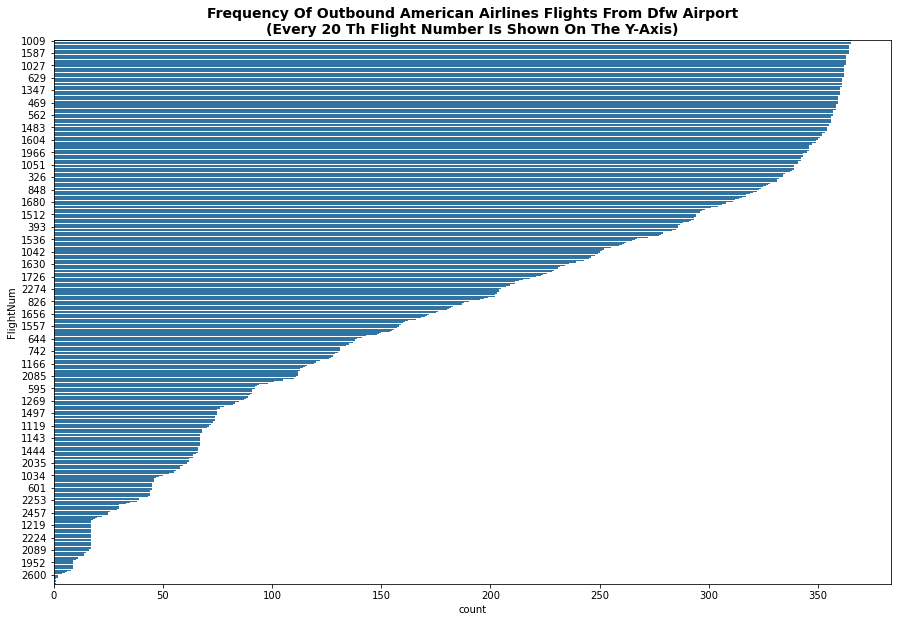

In [26]:
# lets take a look at the frequency of American Airlines flights outbound from DFW airport
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

order = dfw_outbound.FlightNum.value_counts().index

sb.countplot(data=dfw_outbound, y='FlightNum', order=order, color=base_color);
plt.title('Frequency of Outbound American Airlines flights from DFW airport\n(Every 20 th flight number is shown on the y-axis)'.title(),
          fontsize=14, weight='bold')
          
# get current y ticks labels and positions
pos, lab =plt.yticks()

# set new y tick labels every 20th 
plt.yticks(pos[::20], lab[::20]);

In [27]:
# lets take a look at the frequncy of the top 10 flights
dfw_outbound.FlightNum.value_counts().head(10)

1009    365
1395    365
1638    365
5       365
1499    365
1477    365
1104    364
676     364
371     364
123     364
Name: FlightNum, dtype: int64

> We can see that there is a wide range of flight frequncies, some fly out of DFW airport daily and some only once a year. A good proportion fly almost daily. There are 6 daily outbound flights

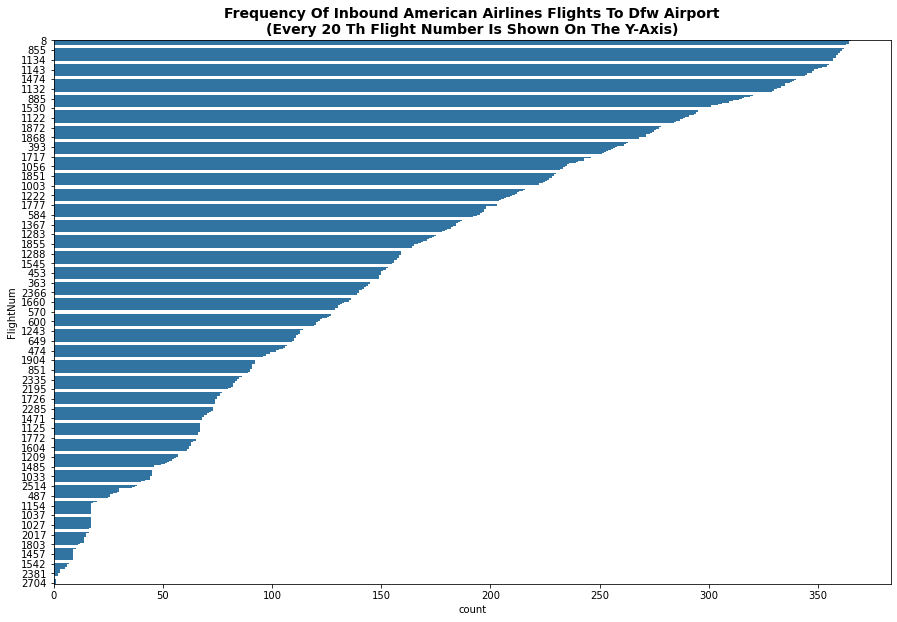

In [28]:
# lets take a look at the frequency of American Airlines inbound to DFW airport
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

order = dfw_inbound.FlightNum.value_counts().index

sb.countplot(data=dfw_inbound, y='FlightNum', order=order, color=base_color);

plt.title('Frequency of Inbound American Airlines flights to DFW airport\n(Every 20 th flight number is shown on the y-axis)'.title(),
          fontsize=14, weight='bold')
          
# get current y ticks labels and positions
pos, lab =plt.yticks()

# set new y tick labels every 20th 
plt.yticks(pos[::20], lab[::20]);

In [29]:
# lets take a look at the frequncy of the top 10 flights
dfw_inbound.FlightNum.value_counts().head(10)

8       365
102     364
676     364
300     364
2434    364
1212    364
517     364
2446    363
2422    363
482     363
Name: FlightNum, dtype: int64

> We see the flights frequency also has a wide range with some flights flying into DFW daily and and others just once a year. There is a smaller portion which fly almost daily compared to the outbound flights. There is only 1 daily inbound flight, which is flight number 8 

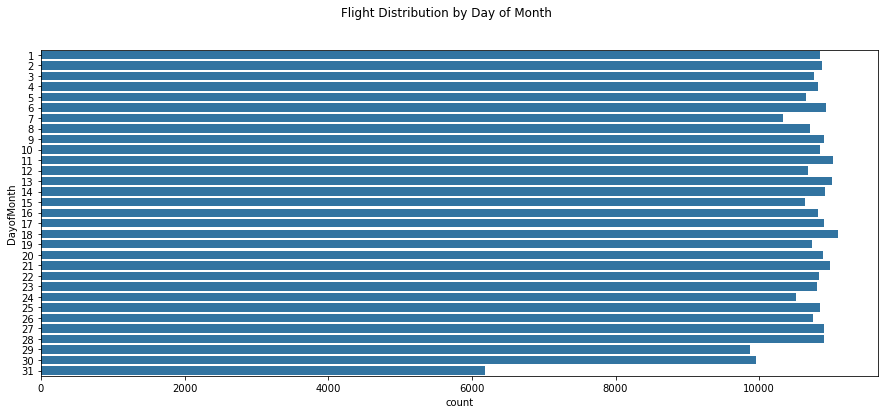

In [30]:
# lets take a look at the frequency of flights by day of month
dom = dfw.DayofMonth.value_counts()
base_color = sb.color_palette()[0]
#order = dfw.DayofMonth.value_counts().index

plt.figure(figsize=[15,6])
sb.countplot(data=dfw, y='DayofMonth', color=base_color)
plt.suptitle('Flight Distribution by Day of Month');

> The order of the days of the months were kept as they are since they have an inherent order. It is expected for the 31st day to have the leaste amount of flights since not all months have 31 days. The maximum flights occur on the 11th day of the month. Next it would be interesting to see the flight frequency by month

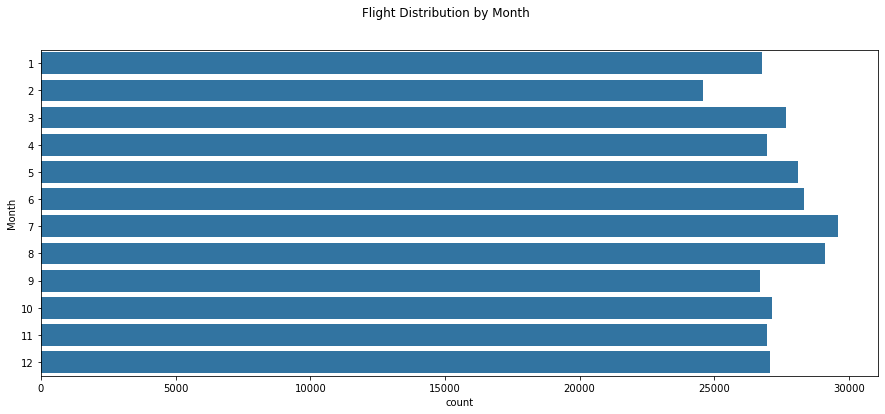

In [31]:
# lets take a look at the frequency of flights by month
month = dfw.Month.value_counts()
base_color = sb.color_palette()[0]
#order = dfw.Month.value_counts().index
#order = dfw.resample('M', on='Month').agg({'Month':'sum'}).sort_values(ascending = False) 

plt.figure(figsize=[15,6])
sb.countplot(data=dfw, y='Month', color=base_color)
plt.suptitle('Flight Distribution by Month');
#for index, value in order:
 #   plt.text(value, index, str(value));   

   

> The order of the months are kept as is since there is an inherent order in months. July and August are the months with the most frequent flights. Next it would be interesting to see flight frequency by day of week

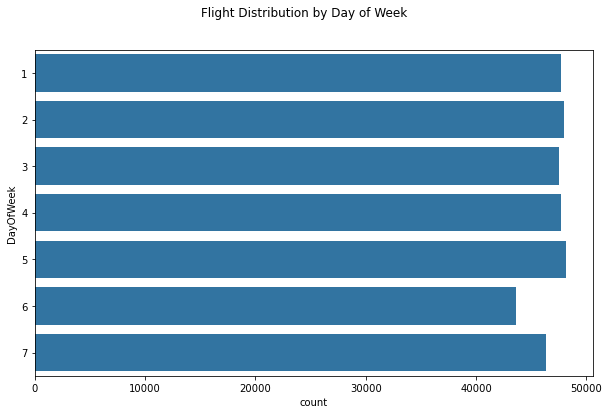

In [32]:
# lets take a look at the frequency of flights by day of week
dow = dfw.DayOfWeek.value_counts()
base_color = sb.color_palette()[0]

plt.figure(figsize=[10,6])
sb.countplot(data=dfw, y='DayOfWeek', color=base_color)
plt.suptitle('Flight Distribution by Day of Week');
#for index, value in enumerate(dow):
 #   plt.text(value, index, str(value));

> We see that week days 2,3,5,1, and 4 have roughly the same number of flights where days 7 and 6 have less flights throughout the year. Next It would be interesting to see on which days do we have the most delays

>1: Monday,
2: Tuesday,
3: Wednesday,
4: Thursday,
5: Friday,
6: Saturday,
7: Sunday

> Now lets take a look at the frequency of delays for American Airlines inbound and outbound flights to DFW airport

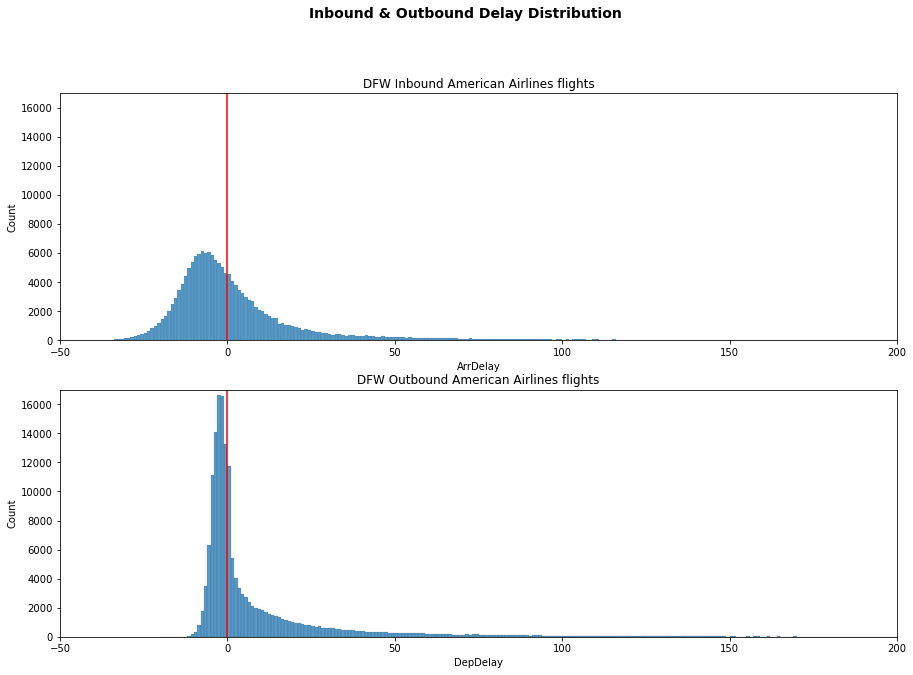

In [33]:
# combine inbound and outbound onto one plot
plt.figure(figsize=[15,10])

# lets take a look at arrival delays for DFW inbound flights
plt.subplot(2,1,1)
bins = np.arange(dfw_inbound.ArrDelay.min(), dfw_inbound.ArrDelay.max()+1, 1) 
sb.histplot(data=dfw_inbound, x='ArrDelay', bins = bins)
plt.xlim([-50,200])
plt.ylim([0,17000])                # this is done so that the inbound and outbound flights are compared on the same y scale
plt.axvline(x=0, color='r')
plt.title('DFW Inbound American Airlines flights');

# Lets take a look at departure delays for DFW outbound flights
plt.subplot(2,1,2)
bins = np.arange(dfw_outbound.DepDelay.min(), dfw_outbound.DepDelay.max()+1, 1)
sb.histplot(data=dfw_outbound, x='DepDelay', bins = bins)
plt.xlim([-50,200])
plt.ylim([0,17000])                # this is done so that the inbound and outbound flights are compared on the same y scale
plt.axvline(x=0, color='r')
plt.title('DFW Outbound American Airlines flights');

plt.suptitle('Inbound & Outbound Delay Distribution'.title(), y=1, fontsize=14, weight='bold');

> For inbound flights, we observe that the majority of flights arrived earlier than scheduduled by around 30 minutes, or on time. The majority of delayed flights are within 60 mins of delays

> For outbound flights, we observe that the majority of flights depart earlier than scheduled by around 20 minutes, or on time. The majority of delayed flights are within 60 minutes of delay

> Each box on the histogram represents a 1 minute interval

> We observe that for outbound flights, the frequency is a lot more precise than spreadout compared to inbound flights. The mode frequency for outbound flights is around 17,000 where inbound mode frequcncy is around 6,000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data types for FlightNum were changed to string. And the data types for: DepTime, CRSDepTime, ArrTime, CRSArrTime where changed to datetime 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the frequency of delayed inbound and outbound flights, the x-axis limits were changed since the data was skewed to the right. 

## Bivariate Exploration


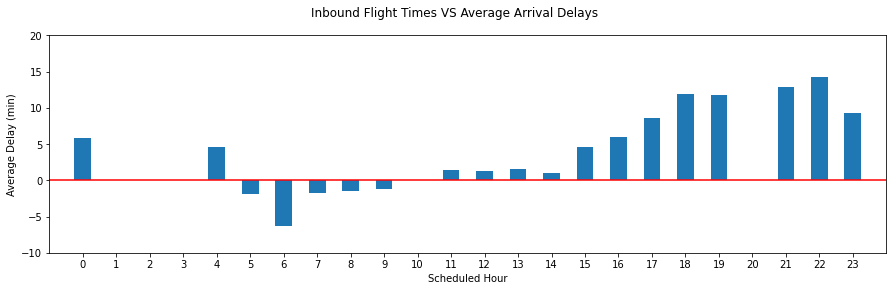

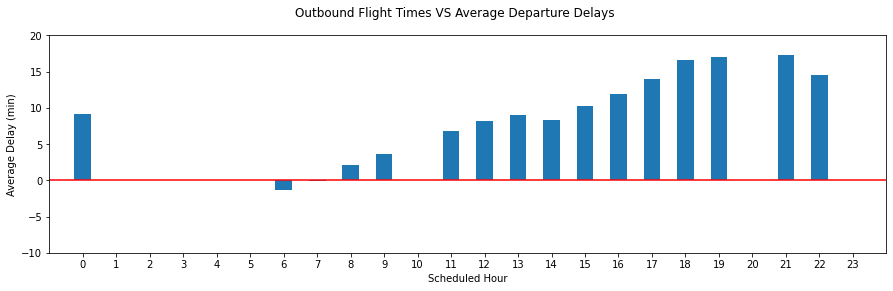

In [34]:
# Does time of day effect delays?

# plot inbound scheduled arrival time vs Average arrival delay
dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean'}).plot.bar(figsize=[15,4],legend=None)
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks, rotation=0)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Inbound Flight Times VS Average Arrival Delays')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-10,20])

# plot outbound scheduled departure time vs Average departure delay
dfw_outbound.resample('H', on = 'CRSDepTime').agg({'DepDelay':'mean'}).plot.bar(figsize=[15,4],legend=None)
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks, rotation=0)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Outbound Flight Times VS Average Departure Delays')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-10,20]);

> From this visualization we see that starting around 11 AM, Dallas Local Time, as the day goes on, we can expect more delays up until 7 PM, with a break at 8 PM, and then steady delays until midnight

> For Inbound flights, this helps visualize there are no flights scheduled to arrive between 1 AM - 3 AM

> For Outbound flights, this helps visualize there are no flights scheduled to depart  between 1 AM -5 AM and also 11 PM

> Both inbound and outbound have no scheduled flights for 10 AM and 8 PM

In [35]:
avg_max_arrival_delay = dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean'}).max()[0]
avg_min_arrival_delay = dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean'}).min()[0]
print('The average maximum arrival delay is {:.1f} minutes, which is at 10 PM'.format(avg_max_arrival_delay))
print('The average minimum arrival delay is {:.1f} minutes, which is at 6 AM'.format(avg_min_arrival_delay))

The average maximum arrival delay is 14.2 minutes, which is at 10 PM
The average minimum arrival delay is -6.3 minutes, which is at 6 AM


> The negative 6.3 means a flight is expected to arrive 6.3 minutes early

In [36]:
avg_max_departure_delay = dfw_outbound.resample('H', on = 'CRSDepTime').agg({'DepDelay':'mean'}).max()[0]
avg_min_departure_delay = dfw_outbound.resample('H', on = 'CRSDepTime').agg({'DepDelay':'mean'}).min()[0]
print('The average maximum departure delay is {:.1f} minutes, which is at 9 PM'.format(avg_max_departure_delay))
print('The average minumum departure delay is {:.1f} minutes, which is at 6 AM'.format(avg_min_departure_delay))

The average maximum departure delay is 17.2 minutes, which is at 9 PM
The average minumum departure delay is -1.4 minutes, which is at 6 AM


> The negative 1.4 means a flight is expected to depart 1.4 minutes early

> This analysis implies the best time to catch a flight leaving DFW airport is 6 AM
    
> The most delays for flights leaving DFW happen around 5 PM to 11 PM

> Furthermore, the best time to catch a flight coming into DFW airport is also at 6 AM

> The most delays for flights coming into DFW happen around 5 Pm to 10 PM

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was interesting to observe that the majority of inbound flights arrived before their scheduled time and also, the majority of outbound flights took off before their scheduled time. 

I wasnt expecting to observe certain hours of the day to not have any scheduled flights. I imagined that flights were scheduled around the clock. Keep in mind this is refering to scheduled times, due to delays or early arrivals, there might be flights incoming and outgoing at all hours of the day. It would be interesting to further explore the delays by day of week 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>
 

## Multivariate Exploration


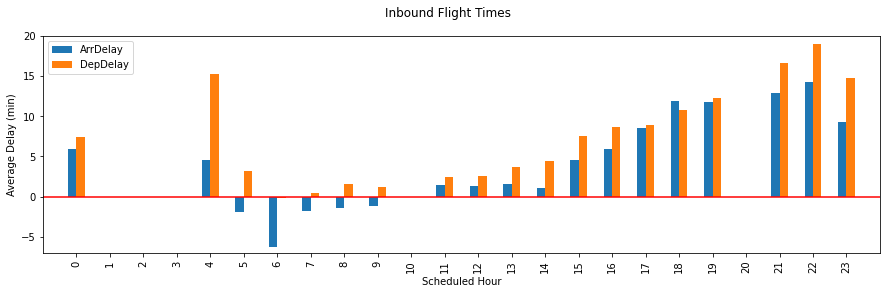

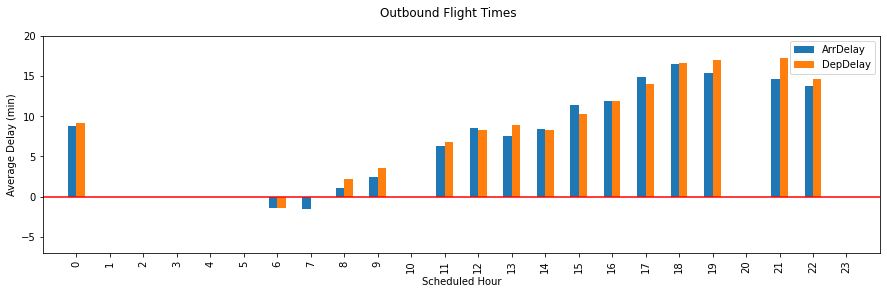

In [37]:
# Does time of day effect delays?

# plot inbound & outbound flights

# plot inbound scheduled arrival time vs arrival delay and departure delay
dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean', 'DepDelay':'mean'}).plot.bar(figsize=[15,4])
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Inbound Flight Times')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-7,20])


# plot outbound scheduled arrival time vs arrival delay and departure delay
dfw_outbound.resample('H', on = 'CRSDepTime').agg({'ArrDelay':'mean', 'DepDelay':'mean'}).plot.bar(figsize=[15,4])
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Outbound Flight Times')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-7,20]);

> Inbound flights generally experience more depaerture delays than arrival delays, especially when their scheduled departure time is late night

> Outbound flights generally tie between departure and arrival delays, however late hours of the night departure delays are slightly longer



In [38]:
df_daily = dfw_inbound.groupby('DayOfWeek').mean()
df_daily

,Year,Month,DayofMonth,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,hour
DayOfWeek,,,,,,,,,,,,,,,,,,,
1,2005.0,6.467620,16.102718,156.921525,157.883022,129.803834,6.692727,7.654224,952.922657,13.107583,14.010108,0.0,0.0,2.340450,0.922238,3.305805,0.012038,4.267805,8.310922
2,2005.0,6.541752,15.470780,155.603450,157.731902,129.212749,3.664188,5.792640,951.556707,12.364426,14.026275,0.0,0.0,2.313087,0.692803,2.298342,0.007603,3.144576,8.314675
3,2005.0,6.520446,15.936534,156.105538,157.843714,129.450579,4.117835,5.856012,952.689619,12.319141,14.335818,0.0,0.0,2.393599,0.581470,2.562224,0.005475,3.083891,8.300274
4,2005.0,6.556989,15.665210,157.147628,157.932698,129.019451,7.380288,8.165357,953.057010,13.564719,14.563458,0.0,0.0,2.540688,0.900013,3.456203,0.016048,4.459648,8.301601
5,2005.0,6.611961,15.490317,155.689178,157.981091,128.972903,5.815144,8.107057,953.209500,12.493226,14.223049,0.0,0.0,2.963843,0.594838,2.342823,0.013756,3.990940,8.286842
6,2005.0,6.564701,15.639781,154.601417,157.102149,128.277366,2.410105,4.910837,950.919296,12.976360,13.347691,0.0,0.0,2.529767,0.438546,2.145130,0.028166,2.258756,8.317513
7,2005.0,6.486760,15.782754,157.175710,158.899489,130.080218,4.936267,6.660047,961.366476,13.349213,13.746279,0.0,0.0,2.488231,0.909960,2.831300,0.011336,3.126861,8.385168


In [39]:
df_dow_avg = dfw_inbound.groupby('CRSArrTime').resample('D', on = 'CRSArrTime').mean()
df_dow_avg

,,Year,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,hour
CRSArrTime,CRSArrTime,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00,1900-01-01,2005.0,6.377094,15.651469,3.976380,156.776710,158.341939,129.328207,5.631969,7.197199,927.204889,12.889041,14.559462,0.0,0.0,3.609448,0.965669,3.005768,0.031035,2.371876,0.0
1900-01-01 00:01:00,1900-01-01,2005.0,6.858511,15.902128,3.953191,125.832979,127.223404,99.726596,4.281915,5.672340,746.985106,13.132979,12.973404,0.0,0.0,2.191489,0.447872,1.744681,0.000000,3.984043,0.0
1900-01-01 00:02:00,1900-01-01,2005.0,7.043673,16.006719,3.989922,118.877940,119.380739,96.152296,4.699888,5.202688,676.834267,9.004479,13.721165,0.0,0.0,4.597984,0.545353,1.733483,0.007839,0.814110,0.0
1900-01-01 00:03:00,1900-01-01,2005.0,7.610329,15.814554,3.897887,107.950704,109.163146,84.812207,2.311033,3.523474,601.861502,12.123239,11.015258,0.0,0.0,2.670188,0.524648,1.414319,0.043427,1.366197,0.0
1900-01-01 00:04:00,1900-01-01,2005.0,6.743682,15.708303,3.914079,160.697473,162.946570,136.995668,5.469314,7.718412,1107.290975,12.132852,11.568953,0.0,0.0,2.303249,0.966787,2.105415,0.010830,4.128520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 23:48:00,1900-01-01,2005.0,2.519231,15.000000,3.615385,136.076923,138.000000,115.615385,12.807692,14.730769,802.000000,3.692308,16.769231,0.0,0.0,2.057692,0.980769,2.019231,0.000000,11.557692,23.0
1900-01-01 23:52:00,1900-01-01,2005.0,11.236842,13.815789,3.631579,187.921053,192.000000,171.789474,6.973684,11.052632,1438.000000,5.105263,11.026316,0.0,0.0,0.263158,0.473684,0.763158,0.000000,9.815789,23.0
1900-01-01 23:53:00,1900-01-01,2005.0,10.947368,13.631579,3.684211,138.157895,145.236842,119.421053,15.763158,22.842105,817.447368,5.131579,13.605263,0.0,0.0,5.078947,0.526316,0.578947,0.000000,15.473684,23.0


In [40]:
#plt.figure(figsize=[15,5])
#sb.catplot(data=dfw_inbound, x='CRSArrTime', y='ArrDelay', hue='DayOfWeek');

In [41]:
#plt.figure(figsize=[15,5])
#sb.catplot(data=dfw_inbound, x='CRSArrTime', y='ArrDelay');

In [42]:
dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean'})

,ArrDelay
CRSArrTime,
1900-01-01 00:00:00,5.882150
1900-01-01 01:00:00,NaN
1900-01-01 02:00:00,NaN
1900-01-01 03:00:00,NaN
1900-01-01 04:00:00,4.571429
1900-01-01 05:00:00,-1.856861
1900-01-01 06:00:00,-6.265857
1900-01-01 07:00:00,-1.789247
1900-01-01 08:00:00,-1.434700


### Inbound

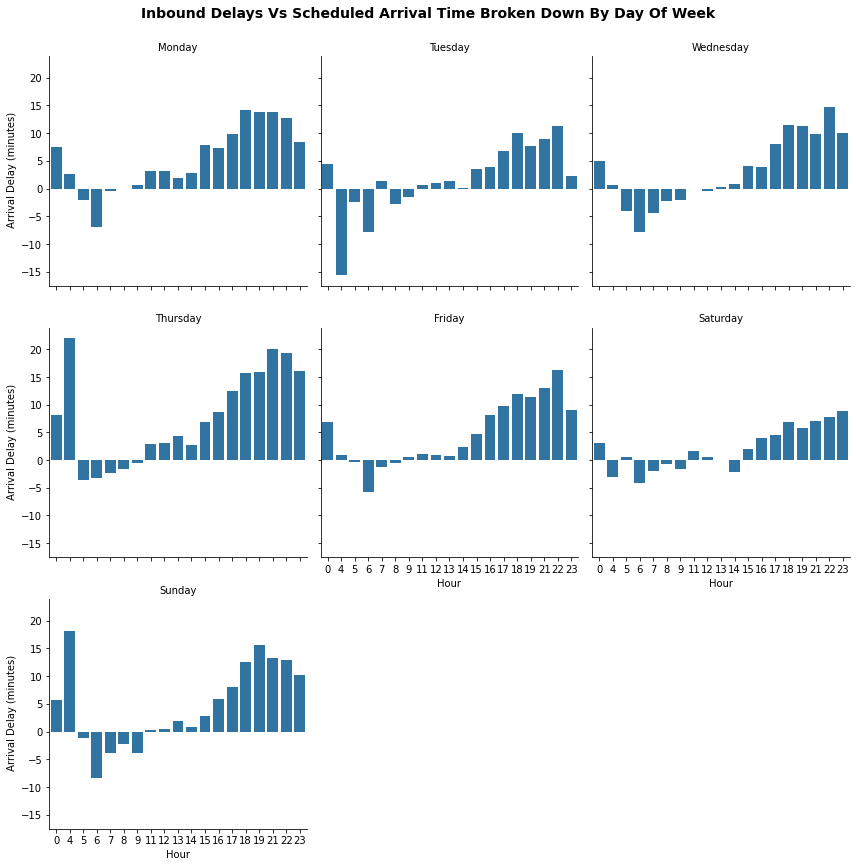

In [51]:
# list days in order
import calendar

day_order = [day for day in calendar.day_name]

# Plot Inbound flight delays by hour of day, then further break it down by day of the week
g = sb.FacetGrid(data=dfw_inbound, col='day_name', margin_titles=True, col_wrap=3, height=4, col_order=day_order)
g.map(sb.barplot, 'hour', 'ArrDelay', ci=None, order=sorted(dfw_inbound.hour.unique()))

# add plot title
plt.suptitle('Inbound Delays VS Scheduled Arrival time broken down by day of week'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Arrival Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
#g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

> The best day of the week to catch an inbound flight is Tuesday morning. you can expect to arrive on average 15 minutes early; whereas Sunday and Thursday mornings you can exoect to arrive on average 15 minutes late

### Outbound

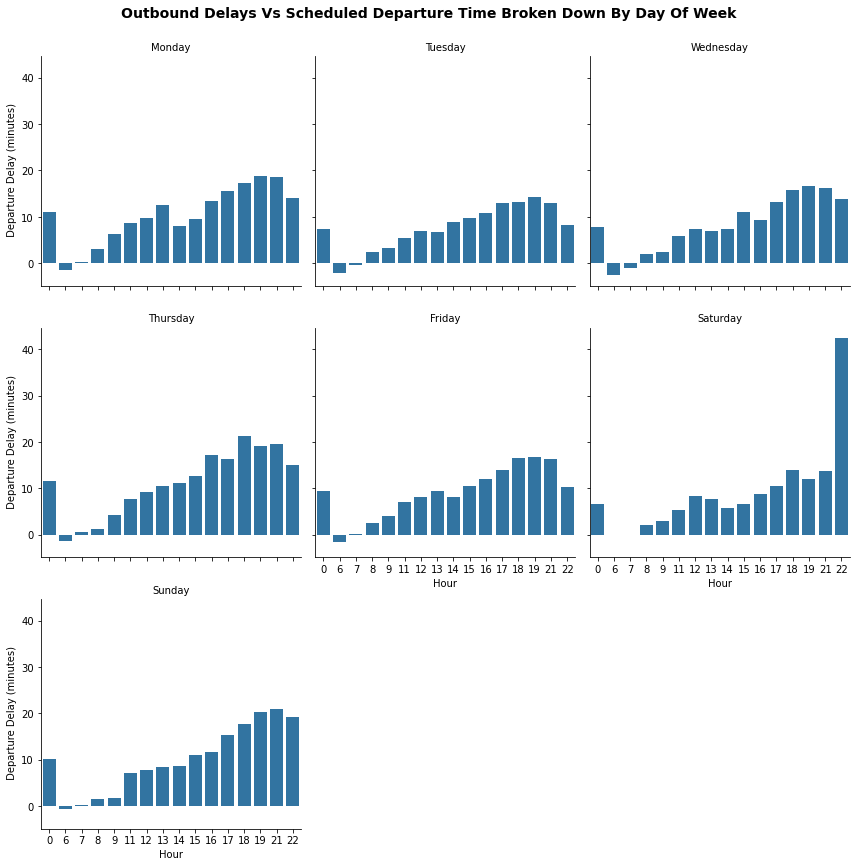

In [52]:
# list days in order
import calendar

day_order = [day for day in calendar.day_name]
# Plot Outbound flight delays by hour of day, then further break it down by day of the week

g = sb.FacetGrid(data=dfw_outbound, col='day_name', margin_titles=True, col_wrap=3, height=4, col_order=day_order)
g.map(sb.barplot, 'hour', 'DepDelay', ci=None, order=sorted(dfw_outbound.hour.unique()))

# add plot title
plt.suptitle('Outbound Delays VS Scheduled Departure time broken down by day of week'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Departure Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
#g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

> The worst day to catch an outbound flight from DFW airport is on Saturday night, where you can expect a delay of 40 minutes on average

### Inbound

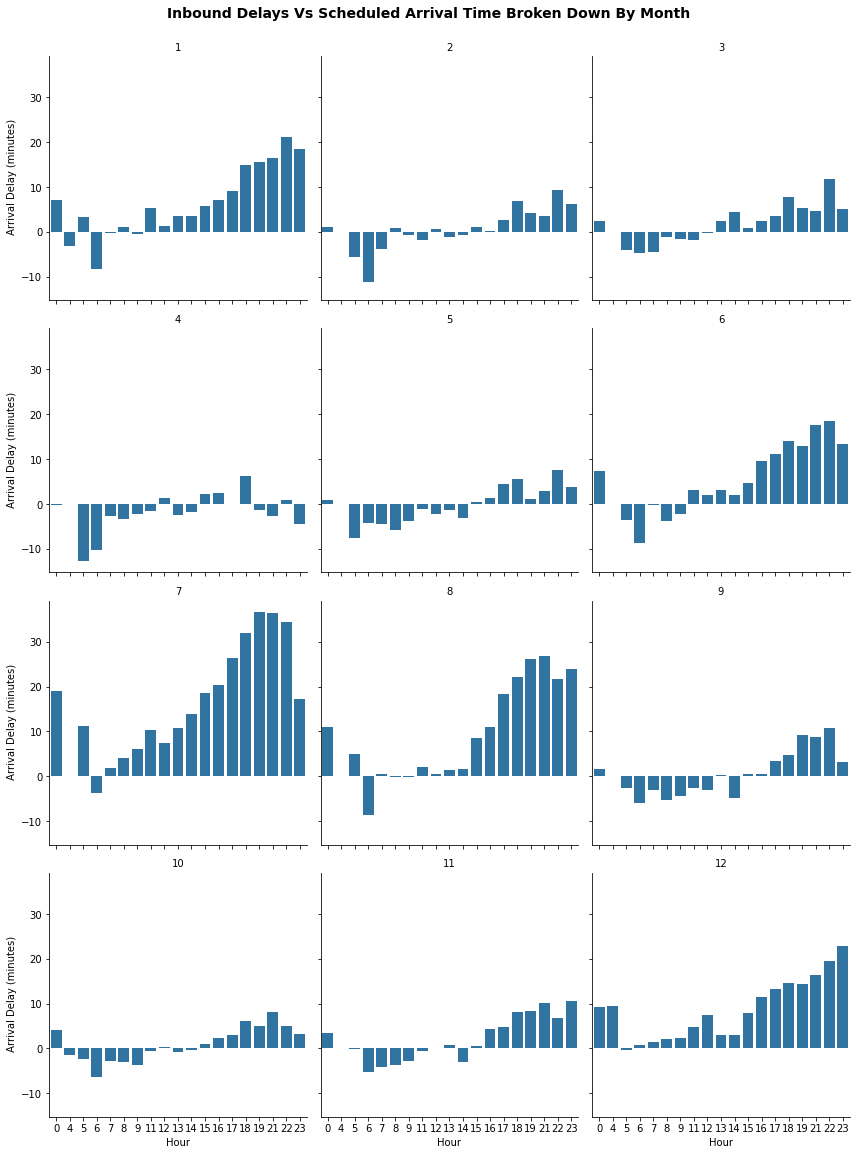

In [45]:
# Plot Inbound Arrival Delays by scheduled arrival time and break down by month
g = sb.FacetGrid(data=dfw_inbound, col='Month', margin_titles=True, col_wrap=3, height=4)
g.map(sb.barplot, 'hour', 'ArrDelay', ci=None, order=sorted(dfw_inbound.hour.unique()));


# add plot title
plt.suptitle('Inbound Delays VS Scheduled Arrival time broken down by Month'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Arrival Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
#g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

> We can see delays get longer during January, then taper off, and delays start getting longer again starting June through August, with the longest delays of the year occur in July. Delays taper off again and pick up for december into January

### Outbound

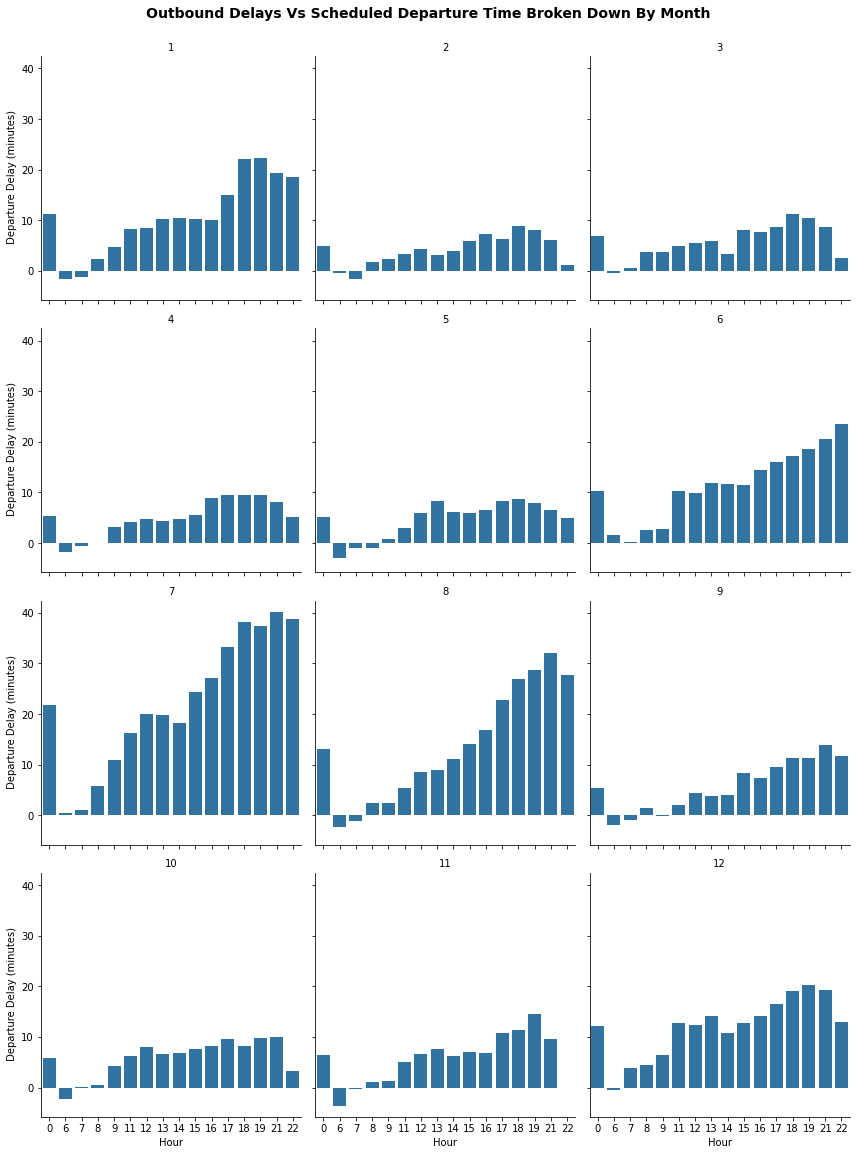

In [46]:
# Plot Outbound Departure Delays by scheduled arrival time and break down by month
g = sb.FacetGrid(data=dfw_outbound, col='Month', margin_titles=True, col_wrap=3, height=4)
g.map(sb.barplot, 'hour', 'DepDelay', ci=None, order=sorted(dfw_outbound.hour.unique()));


# add plot title
plt.suptitle('Outbound Delays VS Scheduled Departure time broken down by Month'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Departure Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
#g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

> A similar trend is seen to inbound flights where delays during January, June, July, August and December are the longest

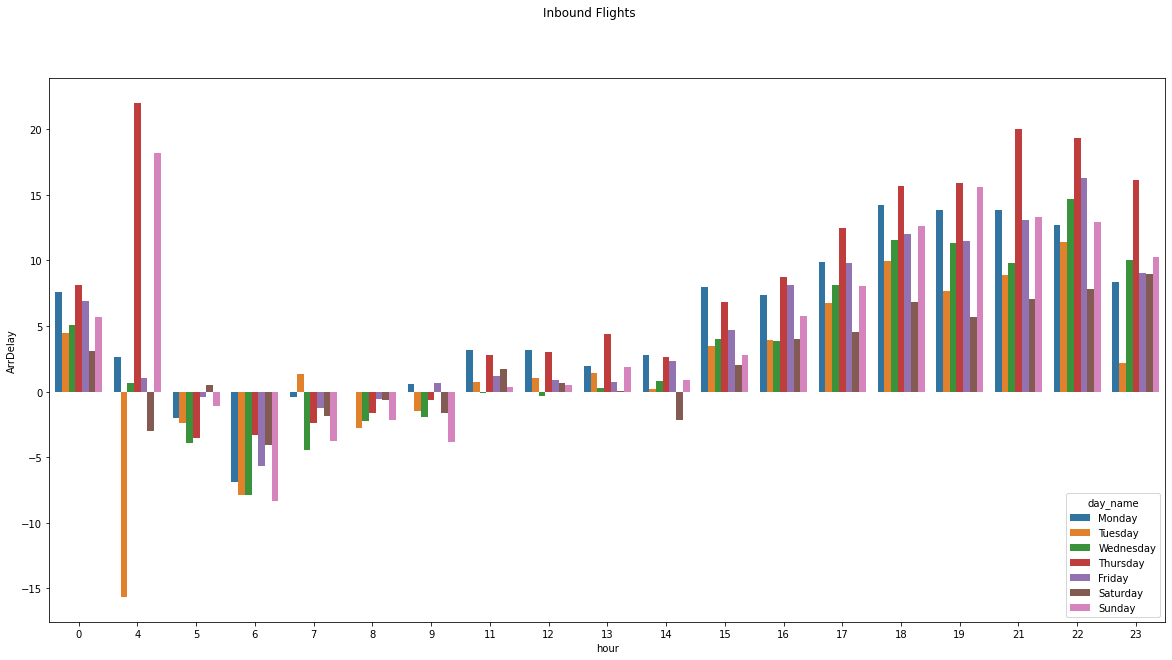

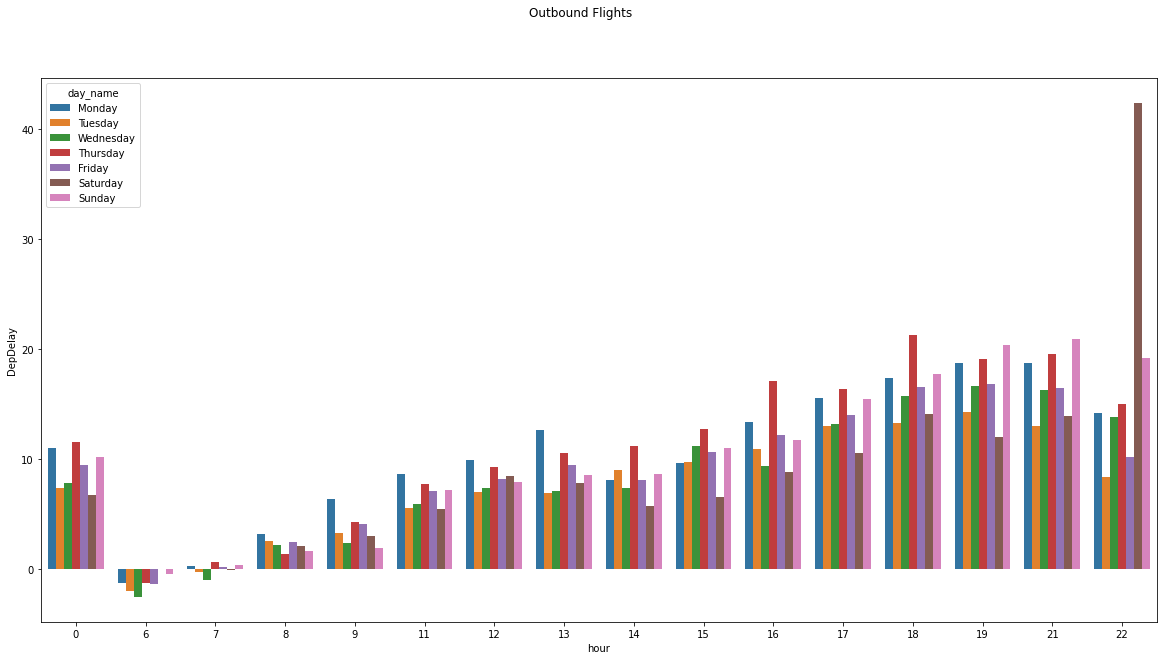

In [47]:
# list days in order
import calendar
day_order = [day for day in calendar.day_name]

# combine day of week and delays into one plot
# Plot inbound flights arrival delays by hour of day and then break further by the day of the week
plt.figure(figsize=[20,10])
sb.barplot(data=dfw_inbound, x='hour', y='ArrDelay', ci=None, hue='day_name', hue_order=day_order)
plt.suptitle('Inbound Flights')

# Plot outbound flights arrival delays by hour of day and then break further by the day of the week
plt.figure(figsize=[20,10])
sb.barplot(data=dfw_outbound, x='hour', y='DepDelay', ci=None, hue='day_name', hue_order=day_order)
plt.suptitle('Outbound Flights');

> Inbound flights have an interesting delay time at 6 AM. On Sundays and Thursday there are heavy delays; Whereas Tuesdays at 6 AM flights arrive around 15 minutes early

> Inbound flights on Thursdays nights can expect above average delays compared to other days of the week

> Outbound flights on late Saturday nights expericence around 40 minutes of departure delays. This would be an interesting pattern to further study

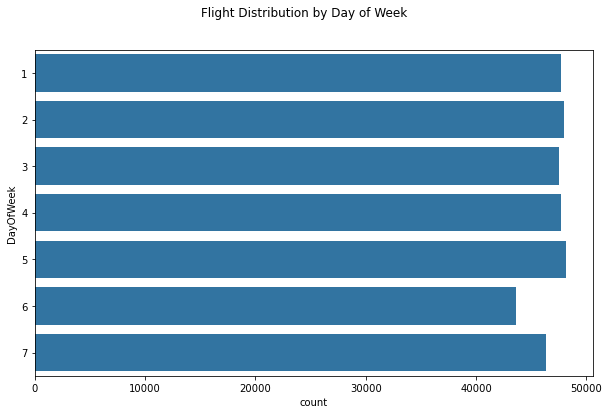

In [50]:
# Its worth repeating this visual from earlier in this exploration to see the distibution of flighty sby day of week
# lets take a look at the frequency of flights by day of week
dow = dfw.DayOfWeek.value_counts()
base_color = sb.color_palette()[0]

plt.figure(figsize=[10,6])
sb.countplot(data=dfw, y='DayOfWeek', color=base_color)
plt.suptitle('Flight Distribution by Day of Week');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The time of day, the day of the week, and also the month that we are in can be a good measure of how much delyas we can expect for inbound and outbound flights. The earlier a flight is scheduled in a day the shorter the delays we can expect. During the summertime and winter breaks we can expect delays to increase. Lastly Saturday night flights out of Dallas Fort Worth Airport experience the longest delays for American Airlines flights during 2005

### Were there any interesting or surprising interactions between features?

> Outbound Saturday night flights were a surprise to see such a dramatic increase in delays compared to any other day. And so were the inbound flights at 6 AM on Sunday, Tuesday and Thursday. This would be a good thing for American Airlines to explore further to determine ways to make the operation smoother. I suspect the Saturday night delays could be due to not having enough staff to work the weekend shift, especially considering that Saturdays have a smaller number of flights than usual as seen on the last visual